In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
%matplotlib inline

In [62]:
df = pd.read_csv('tips.csv')

In [63]:
df.reset_index()

,index,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [64]:
df['Length Name'] = df['Payer Name'].apply(lambda x : len(x)-1)

In [65]:
def tip_percent(bill, tip):
    return tip/(bill-tip)*100

In [66]:
df['tip percent'] = np.round(np.vectorize(tip_percent)(df['total_bill'], df['tip']), 2)

In [67]:
df = df.drop('CC Number', axis = 1)

In [68]:
df['tip percent'].idxmin()

237

In [69]:
df.iloc[237]

total_bill                 32.83
tip                         1.17
sex                         Male
smoker                       Yes
day                          Sat
time                      Dinner
size                           2
price_per_person           16.42
Payer Name          Thomas Brown
Payment ID               Sat2929
Length Name                   11
tip percent                  3.7
Name: 237, dtype: object

In [70]:
x = df['total_bill']
y = df['tip percent']

<AxesSubplot:xlabel='total_bill', ylabel='tip percent'>

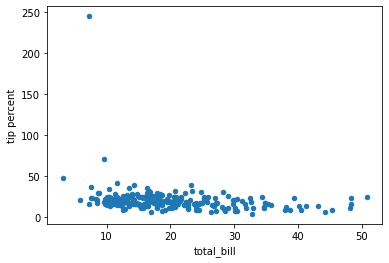

In [74]:
df.plot('total_bill', 'tip percent', kind = 'scatter')

In [72]:
df.corr()

,total_bill,tip,size,price_per_person,Length Name,tip percent
total_bill,1.000000,0.675734,0.598315,0.647554,0.024373,-0.235073
tip,0.675734,1.000000,0.489299,0.347405,-0.028505,0.241566
size,0.598315,0.489299,1.000000,-0.175359,0.040752,-0.102805
price_per_person,0.647554,0.347405,-0.175359,1.000000,-0.007815,-0.222008
Length Name,0.024373,-0.028505,0.040752,-0.007815,1.000000,-0.078942
tip percent,-0.235073,0.241566,-0.102805,-0.222008,-0.078942,1.000000
